In [11]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
csv_file = '/Users/adrianfolge/Documents/lokal:skole/Master/data/Evaluation_scores/big_pipeline.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame (optional)
print(df)

                                        Name_of_model  \
0   ['100CharacterTextSplitter', 'sentence-transfo...   
1   ['100CharacterTextSplitter', 'sentence-transfo...   
2   ['100CharacterTextSplitter', 'text-embedding-3...   
3   ['100CharacterTextSplitter', 'text-embedding-3...   
4   ['100CharacterTextSplitter', 'intfloat/multili...   
5   ['100CharacterTextSplitter', 'intfloat/multili...   
6   ['100RecursiveCharacterTextSplitter', 'sentenc...   
7   ['100RecursiveCharacterTextSplitter', 'sentenc...   
8   ['100RecursiveCharacterTextSplitter', 'text-em...   
9   ['100RecursiveCharacterTextSplitter', 'text-em...   
10  ['100RecursiveCharacterTextSplitter', 'intfloa...   
11  ['100RecursiveCharacterTextSplitter', 'intfloa...   
12  ['500CharacterTextSplitter', 'sentence-transfo...   
13  ['500CharacterTextSplitter', 'sentence-transfo...   
14  ['500CharacterTextSplitter', 'text-embedding-3...   
15  ['500CharacterTextSplitter', 'text-embedding-3...   
16  ['500CharacterTextSplitter'

In [12]:
import ast

def get_SAS_transformer_score(list_string, index):
    list_object = ast.literal_eval(list_string)
    last_value = list_object[index]
    return last_value


In [13]:
import re
list_of_all_scores = []
for index, row in df.iterrows():
    list_elements = row['Name_of_model'][1:-1].split(', ')
    text_splitter = list_elements[0]
    embedding_model = list_elements[1]
    object_reference = list_elements[2]
    class_name = object_reference.split('.')[-1].split(' ')[0]
    score = get_SAS_transformer_score(row['Score'], -1)
    temp_list = []
    temp_list.append(text_splitter)
    temp_list.append(embedding_model)
    temp_list.append(class_name)
    temp_list.append(score)
    list_of_all_scores.append(temp_list)
    #print(row["Name_of_model"])
    #print(get_SAS_transformer_score(row['Score'], -1))
list_of_all_scores

[["'100CharacterTextSplitter'",
  "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'",
  'FAISS',
  0.4595263317227364],
 ["'100CharacterTextSplitter'",
  "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'",
  'Qdrant',
  0.7178011685609818],
 ["'100CharacterTextSplitter'",
  "'text-embedding-3-small'",
  'FAISS',
  0.6222551301121712],
 ["'100CharacterTextSplitter'",
  "'text-embedding-3-small'",
  'Qdrant',
  0.5665868520736694],
 ["'100CharacterTextSplitter'",
  "'intfloat/multilingual-e5-large'",
  'FAISS',
  0.5918162867426873],
 ["'100CharacterTextSplitter'",
  "'intfloat/multilingual-e5-large'",
  'Qdrant',
  0.5747388258576394],
 ["'100RecursiveCharacterTextSplitter'",
  "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'",
  'FAISS',
  0.6550273865461349],
 ["'100RecursiveCharacterTextSplitter'",
  "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'",
  'Qdrant',
  0.6631030082702637],
 ["'100RecursiveCharacterTextSplitter'",
  "'t

In [14]:
data = list_of_all_scores

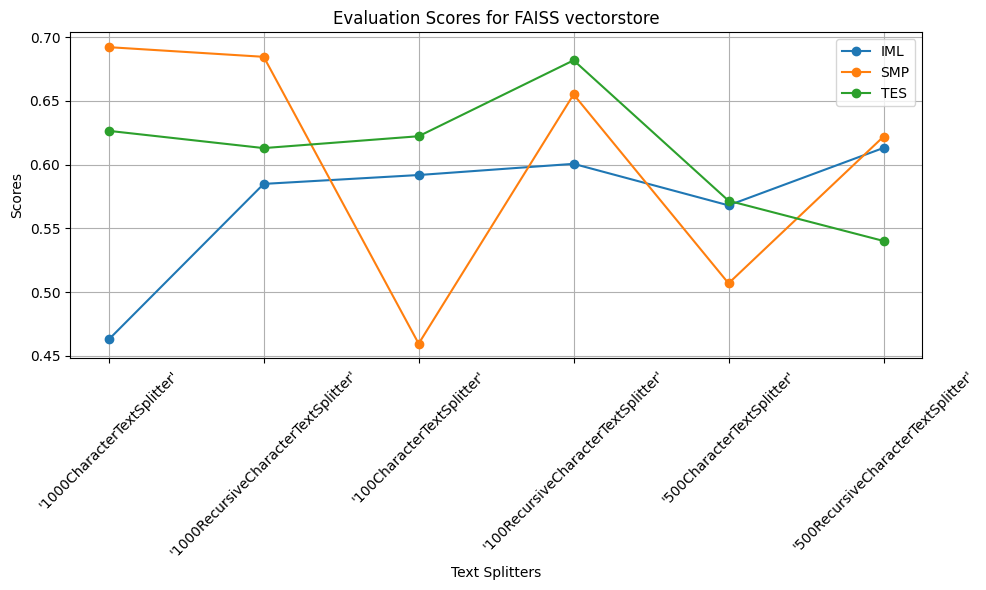

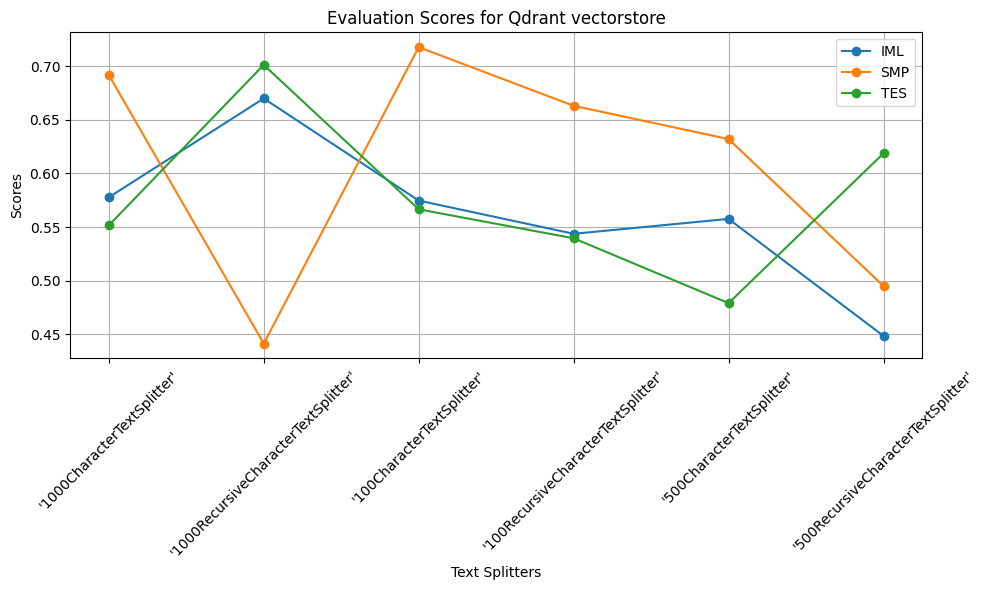

In [16]:
# Mapping of embedding names to shorter versions
embedding_names = {
    "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'": "SMP",
    "'text-embedding-3-small'": "TES",
    "'intfloat/multilingual-e5-large'": "IML"
}

# Extract unique text splitters and embeddings
text_splitters = sorted(set(entry[0] for entry in data))
embeddings = sorted(set(embedding_names[entry[1]] for entry in data))

# Create dictionaries to hold scores for each text splitter
faiss_scores = {splitter: {embedding: None for embedding in embeddings} for splitter in text_splitters}
qdrant_scores = {splitter: {embedding: None for embedding in embeddings} for splitter in text_splitters}

# Populate scores dictionaries
for entry in data:
    splitter, embedding, _, score = entry
    embedding = embedding_names[embedding]
    if entry[2] == 'FAISS':
        faiss_scores[splitter][embedding] = score
    elif entry[2] == 'Qdrant':
        qdrant_scores[splitter][embedding] = score

# Plot data for FAISS embeddings
plt.figure(figsize=(10, 6))
for embedding in embeddings:
    scores = [faiss_scores[splitter][embedding] for splitter in text_splitters]
    plt.plot(text_splitters, scores, marker='o', label=embedding)

plt.xlabel('Text Splitters')
plt.ylabel('Scores')
plt.title('Evaluation Scores for FAISS vectorstore')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot data for Qdrant embeddings
plt.figure(figsize=(10, 6))
for embedding in embeddings:
    scores = [qdrant_scores[splitter][embedding] for splitter in text_splitters]
    plt.plot(text_splitters, scores, marker='o', label=embedding)

plt.xlabel('Text Splitters')
plt.ylabel('Scores')
plt.title('Evaluation Scores for Qdrant vectorstore')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

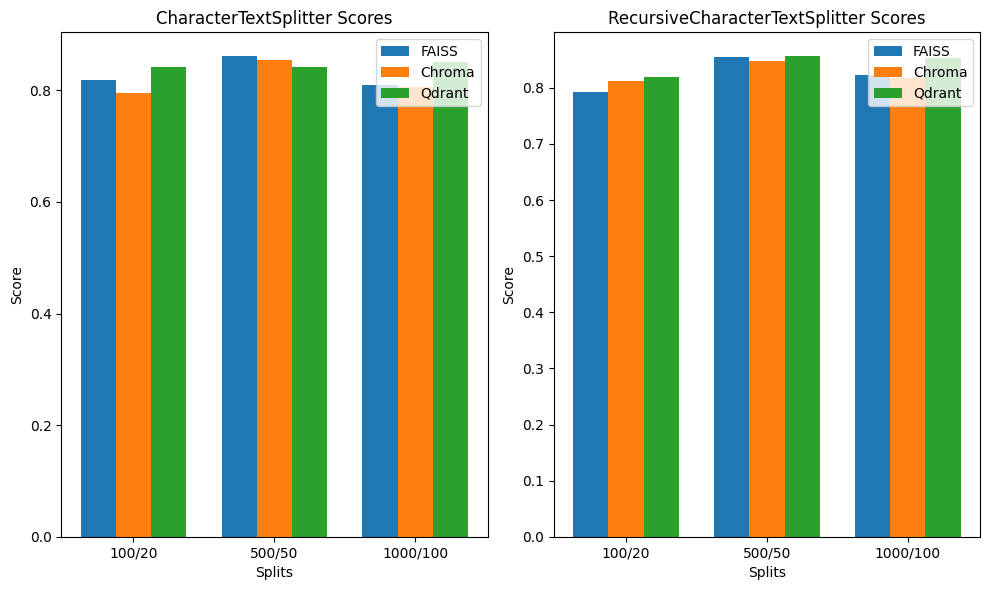

In [4]:
import matplotlib.pyplot as plt

data = {
    'FAISS': {
        'CharacterTextSplitter': [0.818971797823906, 0.8610382914543152, 0.8091022670269012],
        'RecursiveCharacterTextSplitter': [0.7929869055747986, 0.854906690120697, 0.8235115110874176]
    },
    'Chroma': {
        'CharacterTextSplitter': [0.7958654999732971, 0.853868556022644, 0.8060989379882812],
        'RecursiveCharacterTextSplitter': [0.8119494199752808, 0.8481046855449677, 0.8181303024291993]
    },
    'Qdrant': {
        'CharacterTextSplitter': [0.8425466477870941, 0.841649740934372, 0.8509203732013703],
        'RecursiveCharacterTextSplitter': [0.8192575573921204, 0.8561637341976166, 0.8530601143836976]
    }
}

agents = ['CharacterTextSplitter', 'RecursiveCharacterTextSplitter']
splits = ['100/20', '500/50', '1000/100']

plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(splits))

for i, agent in enumerate(agents):
    plt.subplot(1, 2, i+1)
    for j, (agent_name, agent_data) in enumerate(data.items()):
        values = agent_data[agent]
        plt.bar([x + bar_width * j for x in index], values, bar_width, label=agent_name)

    plt.xlabel('Splits')
    plt.ylabel('Score')
    plt.title(f'{agent} Scores')
    plt.xticks([i + bar_width for i in index], splits)
    plt.legend()

plt.tight_layout()
plt.show()




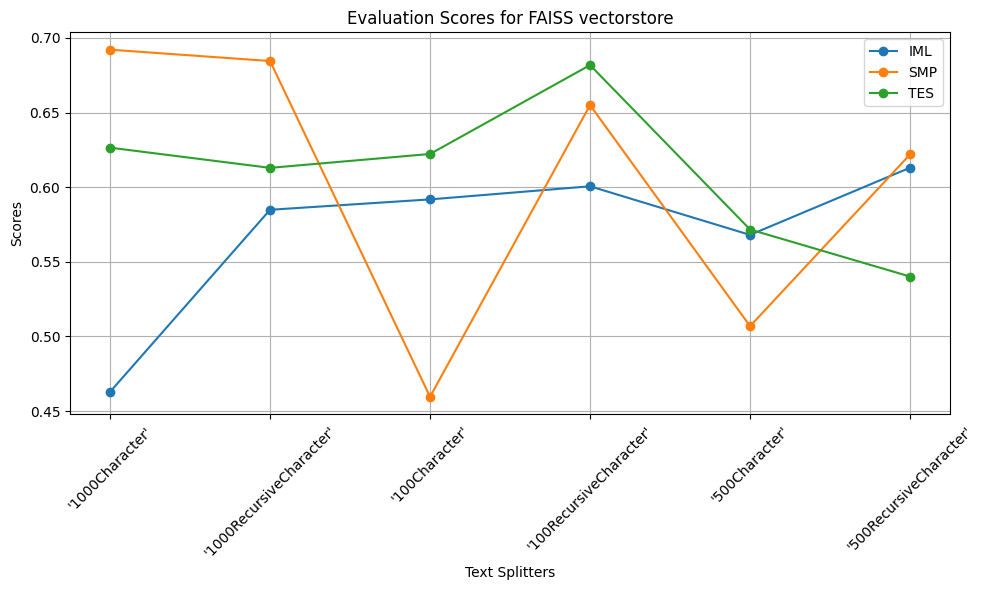

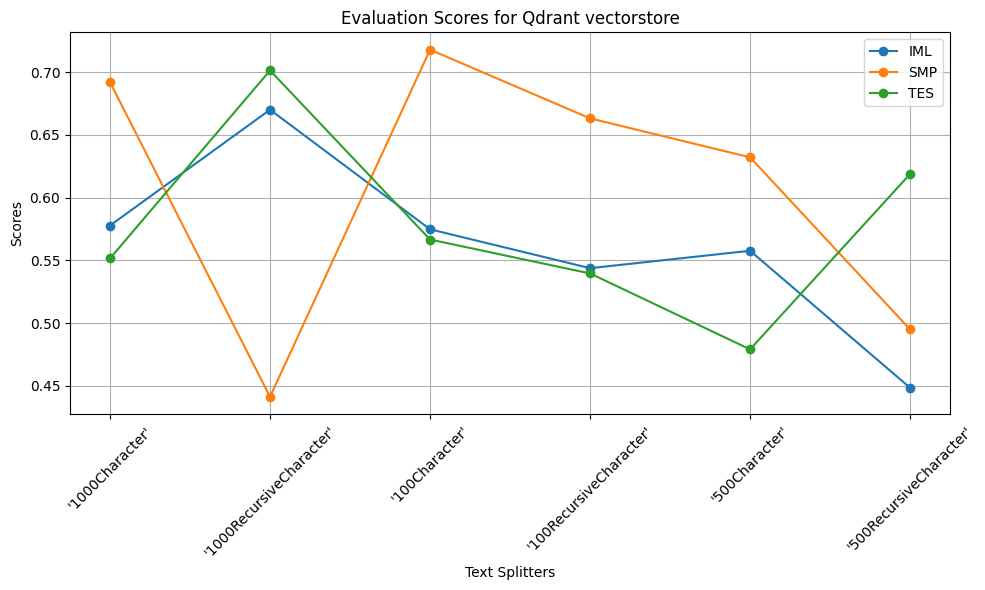

In [17]:
embedding_names = {
    "'sentence-transformers/paraphrase-multilingual-mpnet-base-v2'": "SMP",
    "'text-embedding-3-small'": "TES",
    "'intfloat/multilingual-e5-large'": "IML"
}

# Extract unique text splitters and embeddings
text_splitters = sorted(set(entry[0].replace("TextSplitter", "") for entry in data))
embeddings = sorted(set(embedding_names[entry[1]] for entry in data))

# Create dictionaries to hold scores for each text splitter
faiss_scores = {splitter: {embedding: None for embedding in embeddings} for splitter in text_splitters}
qdrant_scores = {splitter: {embedding: None for embedding in embeddings} for splitter in text_splitters}

# Populate scores dictionaries
for entry in data:
    splitter, embedding, _, score = entry
    splitter = splitter.replace("TextSplitter", "")
    embedding = embedding_names[embedding]
    if entry[2] == 'FAISS':
        faiss_scores[splitter][embedding] = score
    elif entry[2] == 'Qdrant':
        qdrant_scores[splitter][embedding] = score

# Plot data for FAISS embeddings
plt.figure(figsize=(10, 6))
for embedding in embeddings:
    scores = [faiss_scores[splitter][embedding] for splitter in text_splitters]
    plt.plot(text_splitters, scores, marker='o', label=embedding)

plt.xlabel('Text Splitters')
plt.ylabel('Scores')
plt.title('Evaluation Scores for FAISS vectorstore')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot data for Qdrant embeddings
plt.figure(figsize=(10, 6))
for embedding in embeddings:
    scores = [qdrant_scores[splitter][embedding] for splitter in text_splitters]
    plt.plot(text_splitters, scores, marker='o', label=embedding)

plt.xlabel('Text Splitters')
plt.ylabel('Scores')
plt.title('Evaluation Scores for Qdrant vectorstore')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
